<a href="https://colab.research.google.com/github/P-Saha/k-NN_and_Clustering_Analysis/blob/main/Datathon_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Data Import

In the obsesity dataset, the following variables were continuous: Age, Calorie_Intake, Sugar_Intake, Physical_Activity,Fast_Food_Frequency, Screen_Time, Height, Weight, BMI. These variables exhibited notable differences in magnitude. Therefore, to avoid potential biases towards variables with higher magnitudes, all continous variables were normalized before applying the KNN algorithm.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from statsmodels.miscmodels.ordinal_model import OrderedModel
from google.colab import files
import random
from scipy.stats import shapiro
import io

# Set the style for seaborn
sns.set_style('whitegrid')
sns.color_palette()

dfBMI = pd.read_csv('https://raw.githubusercontent.com/P-Saha/k-NN_and_Clustering_Analysis/main/BMI_Dataset.csv')
dfCancer = pd.read_csv('https://raw.githubusercontent.com/P-Saha/k-NN_and_Clustering_Analysis/main/Lung_Cancer_Dataset.csv')

#dfBMI['Gender'] = dfBMI['Gender'].map({'Male': 1, 'Female': 0})
#dfCancer['Gender'] = dfCancer['Gender'].map({1: 1, 2: 0})

#dfBMI = dfBMI.drop(['Height','Weight'], axis=1)

print(dfBMI.dtypes, "\n")
print(dfCancer.dtypes)


Age                      int64
Gender                  object
Calorie_Intake           int64
Sugar_Intake             int64
Physical_Activity        int64
Fast_Food_Frequency      int64
Screen_Time              int64
Height                 float64
Weight                 float64
BMI                    float64
dtype: object 

Age                  int64
Gender               int64
Air Pollution        int64
Alcohol Usage        int64
Genetic Risk         int64
Lung Disease         int64
Obesity              int64
Smoking              int64
Passive Smoker       int64
Chest Pain           int64
Coughing of Blood    int64
Severity             int64
dtype: object


In [ ]:
dfCancer.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


# Exploratory Data Analysis and Visualization
In this section we create various plots to visualise the data in order to have a general initial understanding of the datasets and identify clear or obvious patterns and trends in the dataset.



## Obesity Dataset

In [ ]:
# BMI Variables
var_obsese = list(dfBMI.columns)
print(var_obsese)

['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI']


In [ ]:
# Examining Missing Data
print("Missing Value Distribution:")
print(dfBMI.isnull().mean())
print("")

Missing Value Distribution:
Age                    0.0
Gender                 0.0
Calorie_Intake         0.0
Sugar_Intake           0.0
Physical_Activity      0.0
Fast_Food_Frequency    0.0
Screen_Time            0.0
Height                 0.0
Weight                 0.0
BMI                    0.0
dtype: float64



In [ ]:
# Descriptive Statistics
print(dfBMI.describe())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

<ipython-input-6-9b41611829cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfBMI.corr(), annot=False)


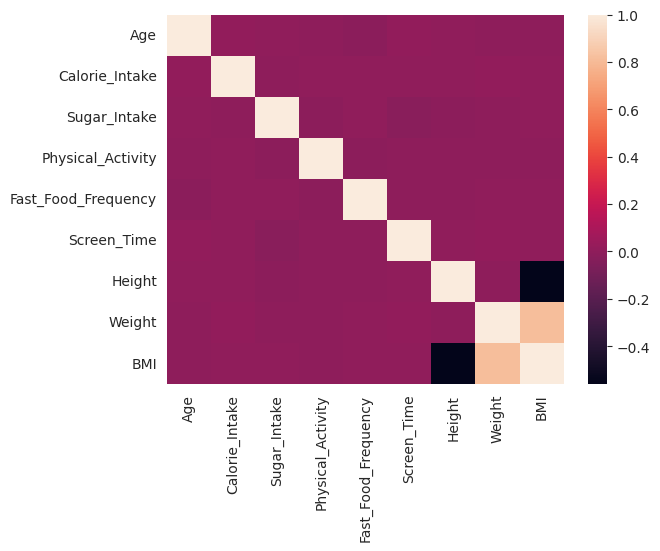

In [ ]:
# Correlation Heatmap
sns.heatmap(dfBMI.corr(), annot=False)
plt.show()

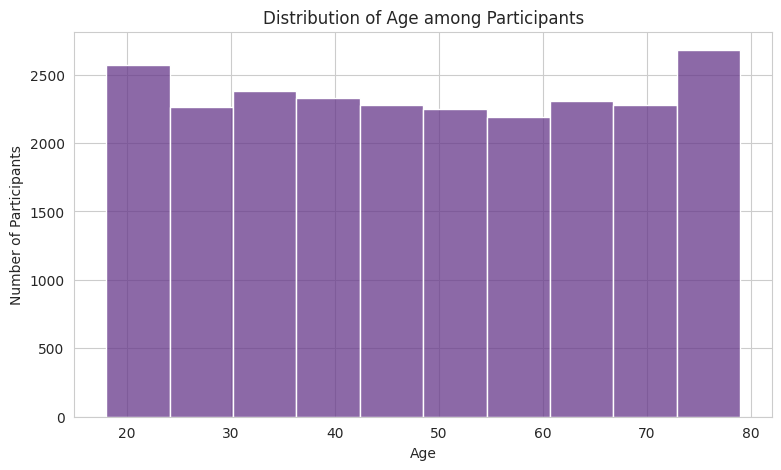

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.954, p=0.000
Sample does not look Gaussian, thus reject H0


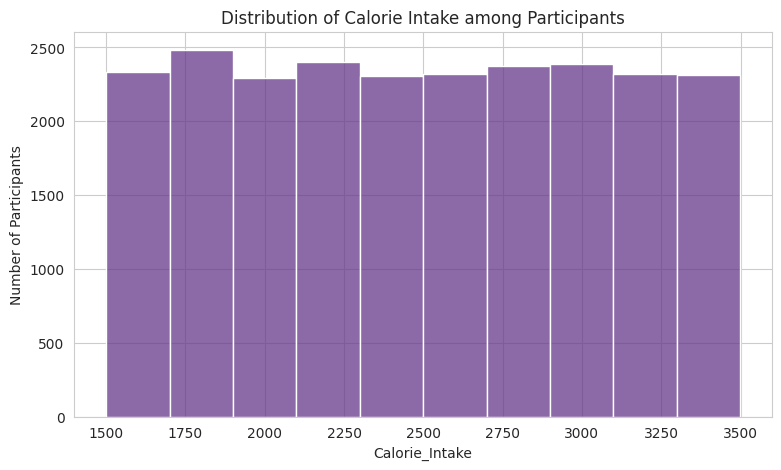

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.955, p=0.000
Sample does not look Gaussian, thus reject H0


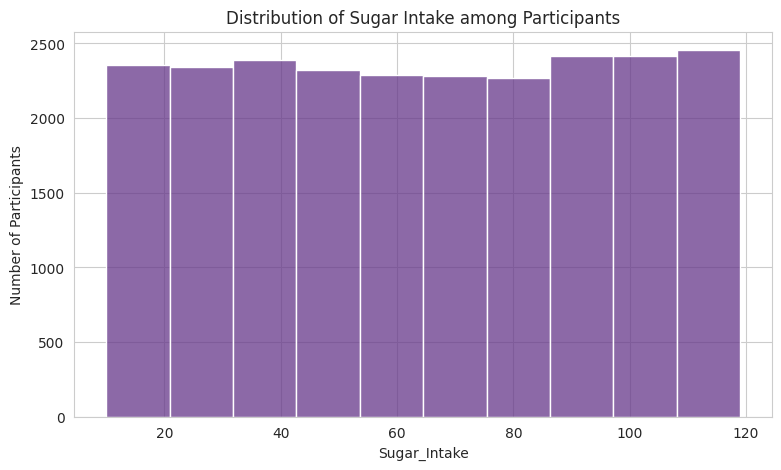

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.952, p=0.000
Sample does not look Gaussian, thus reject H0


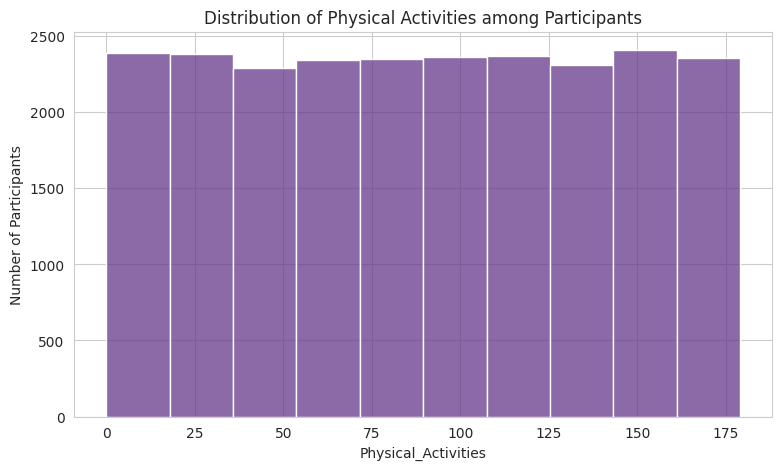

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.954, p=0.000
Sample does not look Gaussian, thus reject H0


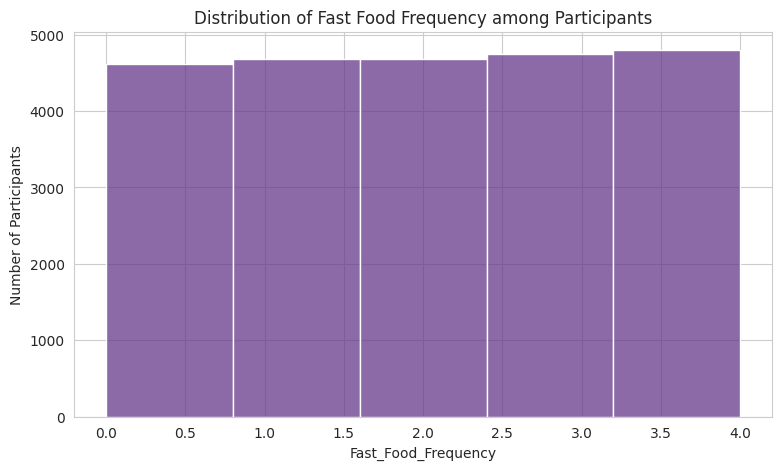

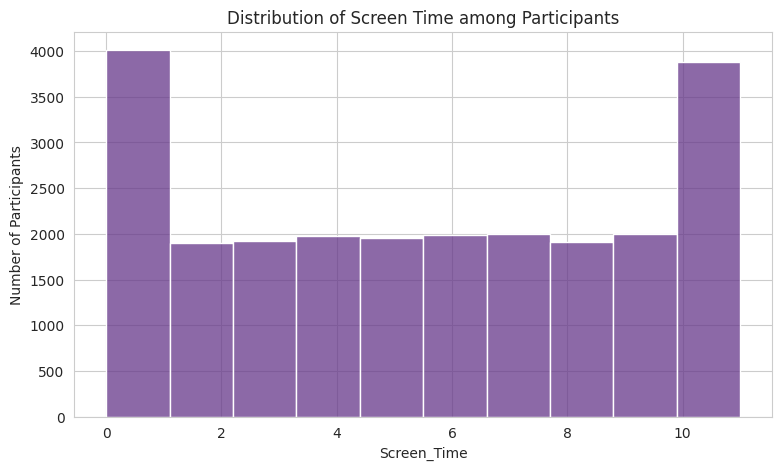

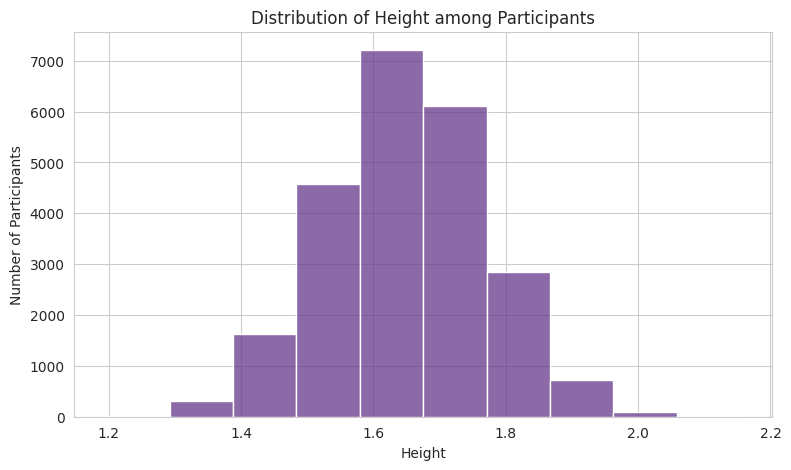

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=1.000, p=0.869
Sample looks Gaussian, thus failed to reject H0


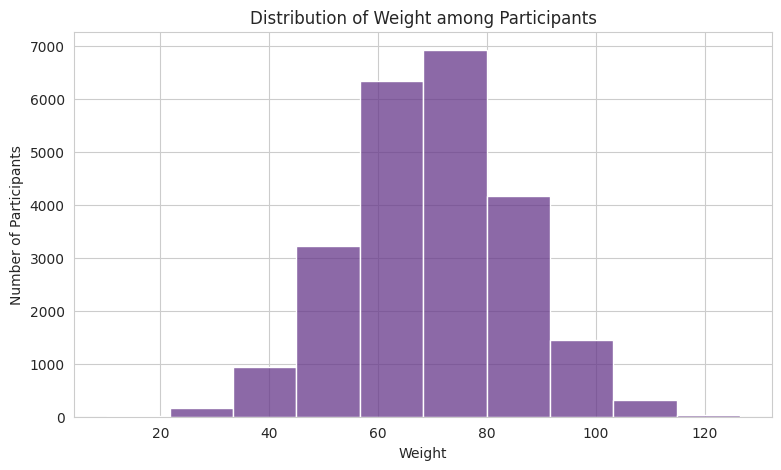

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=1.000, p=0.388
Sample looks Gaussian, thus failed to reject H0


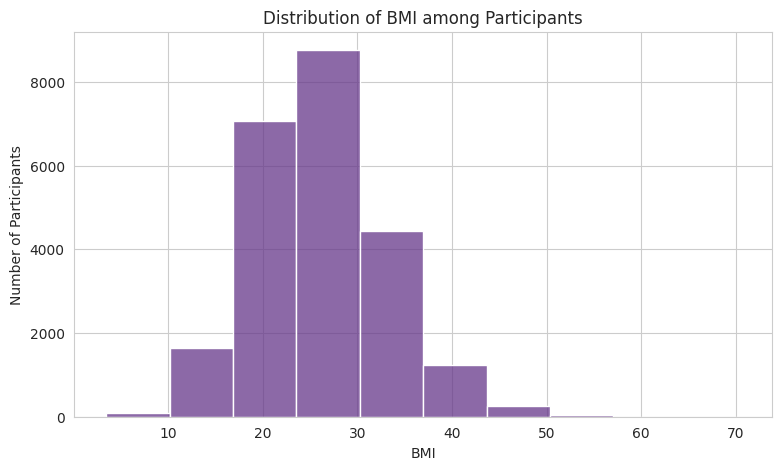

Statistics=0.989, p=0.000
Sample does not look Gaussian, thus reject H0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Testing normality in the Canadian obesity data

# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'Age' feature
plt.figure(figsize=(9, 5))
sns.histplot(dfBMI['Age'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Age among Participants')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfBMI.Age)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

########################################################################
#Similar method was applied to the remaining continuous variables:

##Caloric Intake
plt.figure(figsize=(9, 5))
sns.histplot(dfBMI['Calorie_Intake'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Calorie Intake among Participants')
plt.xlabel('Calorie_Intake')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfBMI.Calorie_Intake)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

########################################################################
##Sugar Intake
plt.figure(figsize=(9, 5))
sns.histplot(dfBMI['Sugar_Intake'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Sugar Intake among Participants')
plt.xlabel('Sugar_Intake')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfBMI.Sugar_Intake)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

########################################################################
##Physical Activity
plt.figure(figsize=(9, 5))
sns.histplot(dfBMI['Physical_Activity'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Physical Activities among Participants')
plt.xlabel('Physical_Activities')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfBMI.Physical_Activity)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")


########################################################################
##Fast Food Frequency
plt.figure(figsize=(9, 5))
sns.histplot(dfBMI['Fast_Food_Frequency'], bins=5, kde=False, color='#66378a')
plt.title('Distribution of Fast Food Frequency among Participants')
plt.xlabel('Fast_Food_Frequency')
plt.ylabel('Number of Participants')
plt.show() #ordinal

########################################################################
##Screen Time
plt.figure(figsize=(9, 5))
sns.histplot(dfBMI['Screen_Time'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Screen Time among Participants')
plt.xlabel('Screen_Time')
plt.ylabel('Number of Participants')
plt.show() #ordinal

########################################################################
##Height
plt.figure(figsize=(9, 5))
sns.histplot(dfBMI['Height'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Height among Participants')
plt.xlabel('Height')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfBMI.Height)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

########################################################################
##Weight
plt.figure(figsize=(9, 5))
sns.histplot(dfBMI['Weight'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Weight among Participants')
plt.xlabel('Weight')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfBMI.Weight)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

########################################################################
##BMI
plt.figure(figsize=(9, 5))
sns.histplot(dfBMI['BMI'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of BMI among Participants')
plt.xlabel('BMI')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfBMI.BMI)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

## Lung Cancer Dataset

In [ ]:
# Cancer Variables
var_cancer = list(dfCancer.columns)
print(var_cancer)

['Age', 'Gender', 'Air Pollution', 'Alcohol Usage', 'Genetic Risk', 'Lung Disease', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Severity']


In [ ]:
# Examining Missing Data
print("Missing Value Distribution:")
print(dfCancer.isnull().mean())
print("")

Missing Value Distribution:
Age                  0.0
Gender               0.0
Air Pollution        0.0
Alcohol Usage        0.0
Genetic Risk         0.0
Lung Disease         0.0
Obesity              0.0
Smoking              0.0
Passive Smoker       0.0
Chest Pain           0.0
Coughing of Blood    0.0
Severity             0.0
dtype: float64



In [ ]:
# Descriptive Statistics
print(dfCancer.describe())

               Age       Gender  Air Pollution  Alcohol Usage  Genetic Risk  \
count  1465.000000  1465.000000    1465.000000    1465.000000   1465.000000   
mean     37.238225     1.404778       3.958362       4.258020      3.892150   
std      12.078575     0.491017       2.033272       2.564265      2.134635   
min      14.000000     1.000000       1.000000       1.000000      1.000000   
25%      28.000000     1.000000       2.000000       2.000000      2.000000   
50%      36.000000     1.000000       4.000000       4.000000      3.000000   
75%      45.000000     2.000000       6.000000       7.000000      6.000000   
max      73.000000     2.000000       8.000000       8.000000      7.000000   

       Lung Disease      Obesity      Smoking  Passive Smoker   Chest Pain  \
count   1465.000000  1465.000000  1465.000000     1465.000000  1465.000000   
mean       3.741297     3.844369     3.425256        3.606826     3.817065   
std        1.899984     2.072213     2.273040        2

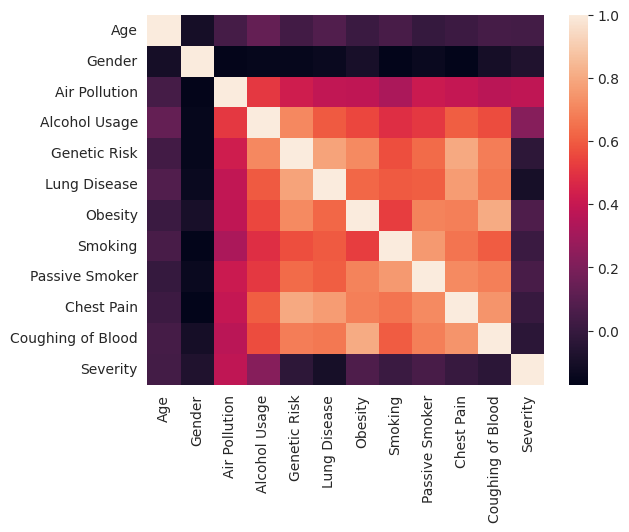

In [ ]:
# Correlation Heatmap
sns.heatmap(dfCancer.corr(), annot=False)
plt.show()

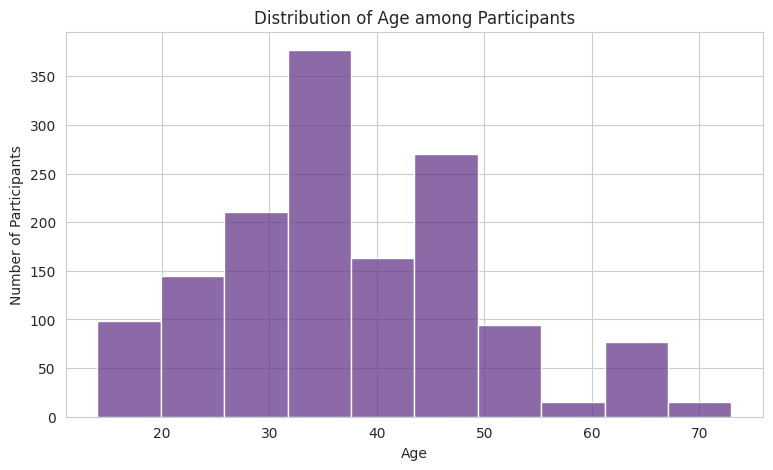

Statistics=0.970, p=0.000
Sample does not look Gaussian, thus reject H0


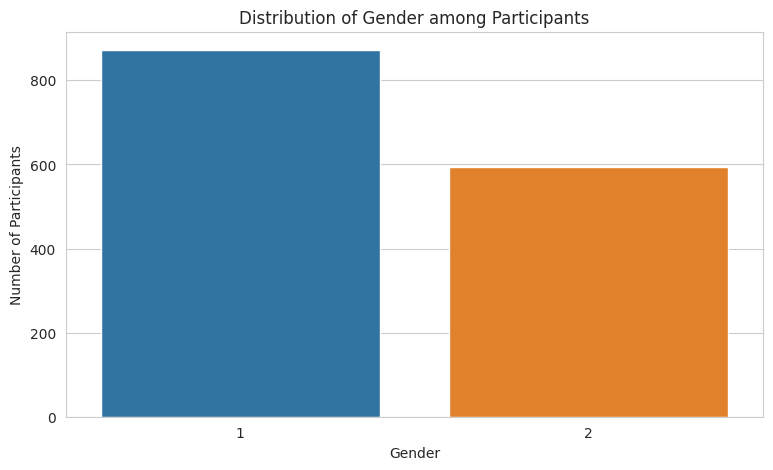

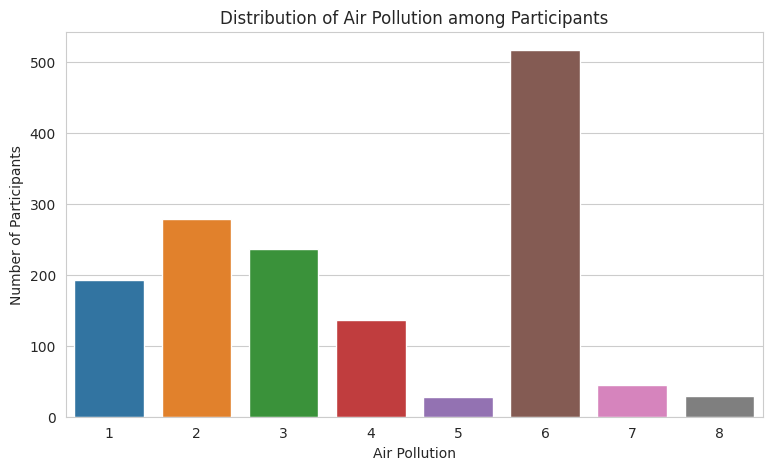

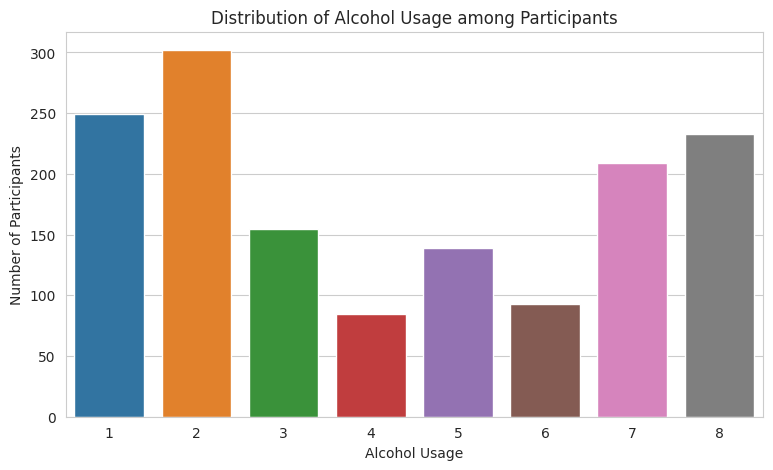

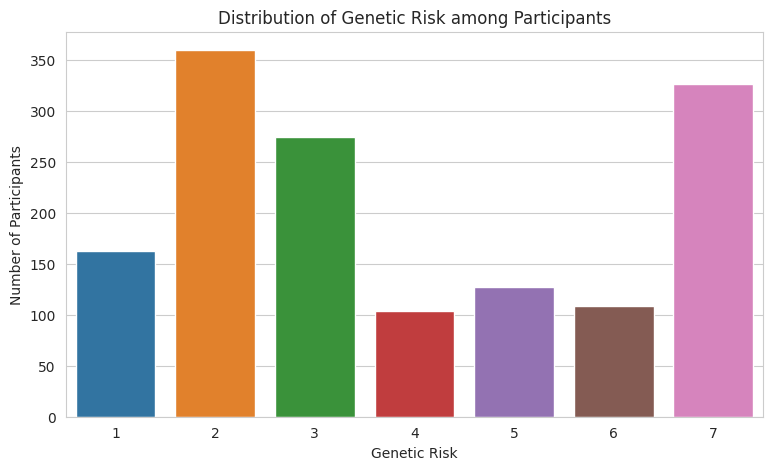

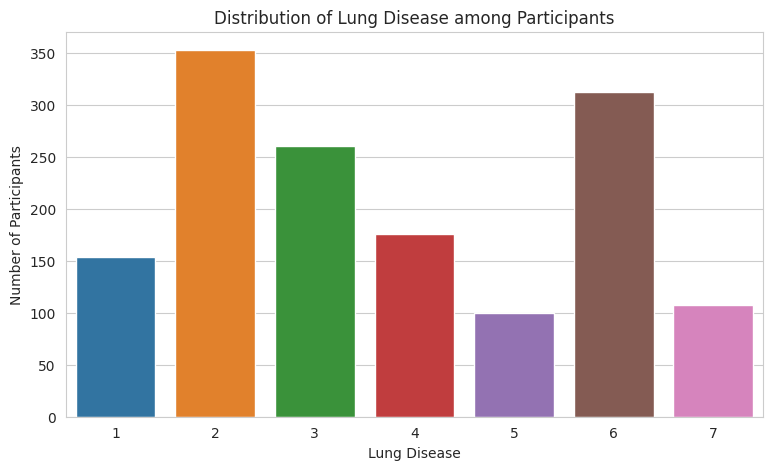

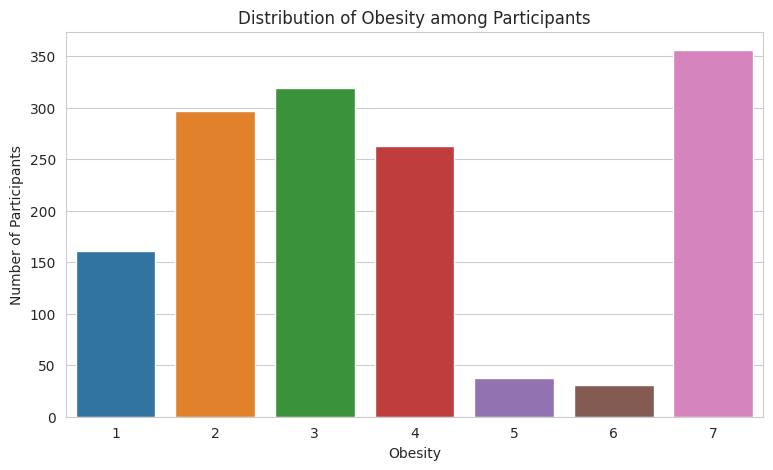

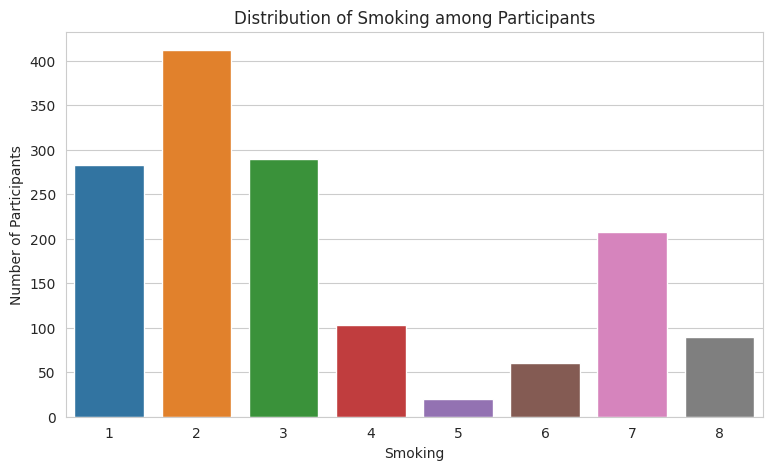

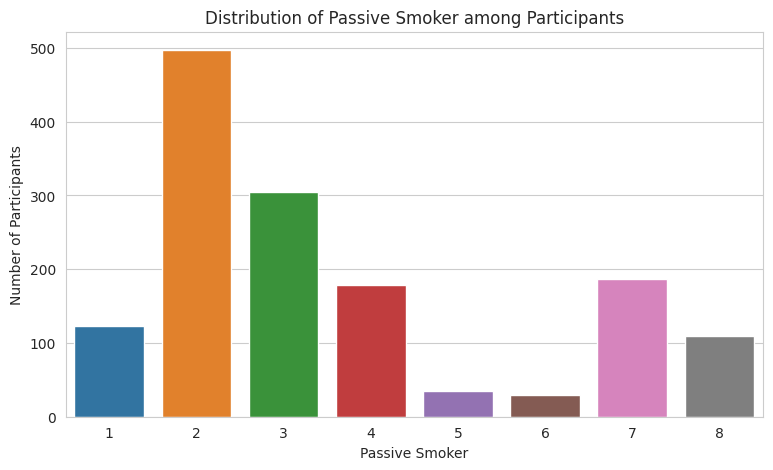

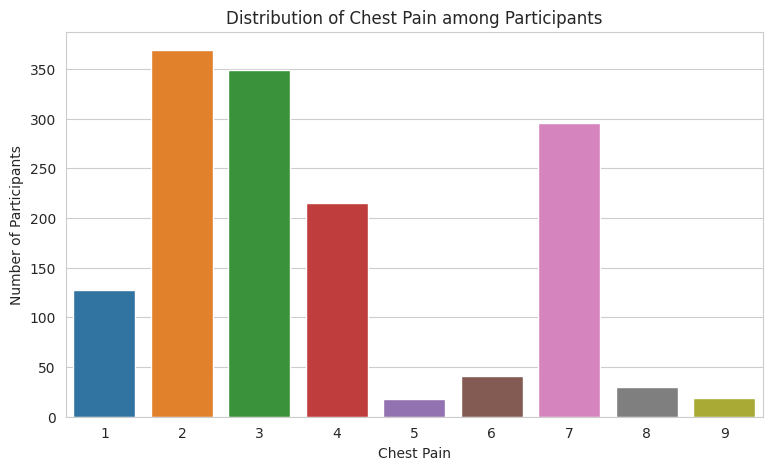

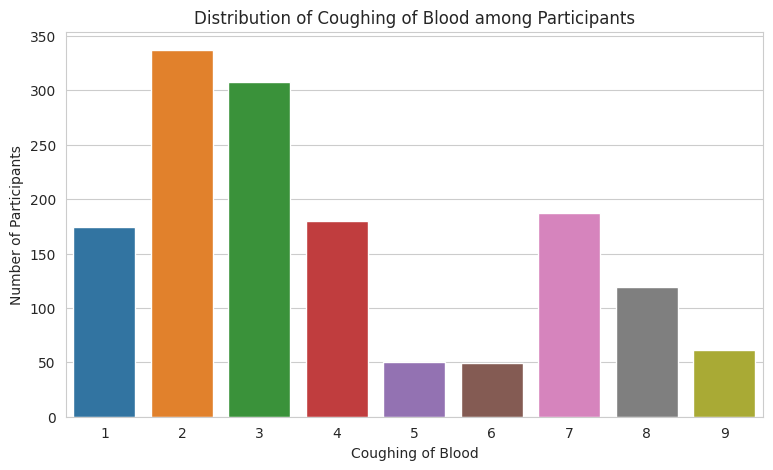

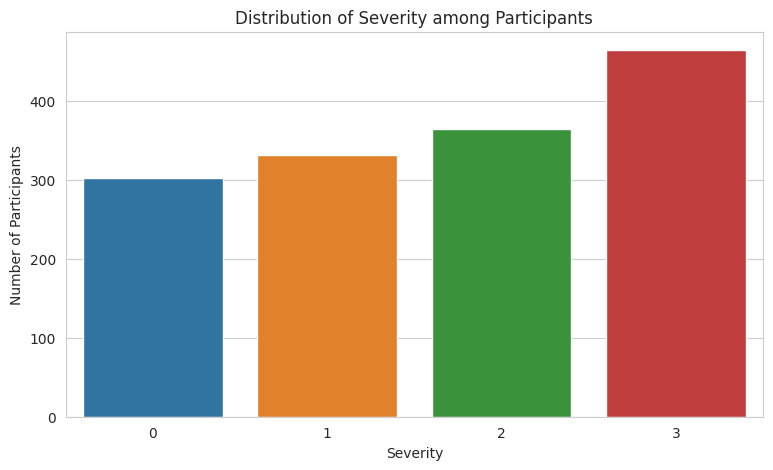

In [ ]:
XCancer = dfCancer[['Air Pollution','Alcohol Usage','Genetic Risk','Lung Disease',
                    'Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood']]
yCancer = dfCancer['Severity']

# Plotting histogram for all variables

##Age
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Age'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Age among Participants')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfCancer.Age)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

##################################################################
##Gender

plt.figure(figsize=(9, 5))
sns.countplot(data=dfCancer, x='Gender')
plt.title('Distribution of Gender among Participants')
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.show() #categorical

# Ordinal Variables
for col in XCancer.columns:
  plt.figure(figsize=(9, 5))
  sns.countplot(data=dfCancer, x=col)
  plt.title('Distribution of ' + col + ' among Participants')
  plt.xlabel(col)
  plt.ylabel('Number of Participants')
  plt.show() #ordinal

plt.figure(figsize=(9, 5))
sns.countplot(data=dfCancer, x='Severity')
plt.title('Distribution of Severity among Participants')
plt.xlabel('Severity')
plt.ylabel('Number of Participants')
plt.show() #ordinal


# Pre-processing

In the obsesity dataset, the following variables were continuous: Age, Calorie_Intake, Sugar_Intake, Physical_Activity,Fast_Food_Frequency, Screen_Time, Height, Weight, BMI. These variables exhibited notable differences in magnitude. Therefore, to avoid potential biases towards variables with higher magnitudes, all continous variables were normalized before applying the KNN algorithm.

In the cancer dataset, most variables were categorical/ordinal with similar number of ordinal levels. The age and gender data is removed due to low correlation.

In [ ]:
# Dropping Age and Gender
dfCancer.drop('Age', axis=1, inplace=True)
dfCancer.drop('Gender', axis=1, inplace=True)

# Setting X and y
X = dfCancer[['Air Pollution','Alcohol Usage','Genetic Risk','Lung Disease',
              'Obesity','Smoking','Passive Smoker','Chest Pain','Coughing of Blood']]
y = dfCancer['Severity']

# Scaling
minMaxScaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(minMaxScaler.fit_transform(X.values))

# k-NN Prediction Model for Lung Cancer Dataset

In [ ]:
# Defining Functions:

# Plots a confusion matrix
def confusionPlot(classes, y_test, y_pred):
  # Plotting the confusion matrix
  plt.figure(figsize=(7,5))
  sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples',
              annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  return plt

# Elbow Method from "KNN_elbow_point_JZ"
# Loop over k_values to train and test the KNN classifier, plots the errors
def elbowPointPlot(X, y, k_values, t_size=0.2, r_state=0):
  # Split dataset into training set and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=r_state)

  # Choose a range of k values to test.

  # A list to keep track of the error rates for each k value.
  errors = []

  for k in k_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_train, y_train)

    # Predict the labels for the test set.
    y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

  # Plotting
  # This visualization helps in understanding the relationship between k value and the error rate.
  plt.figure(figsize=(12, 6))
  plt.plot(range(1,50), errors, marker='o')
  plt.title('Error Rate vs. k Value')
  plt.xlabel('k')
  plt.ylabel('Error Rate')
  plt.grid(True)
  plt.show()

  return np.array(errors)

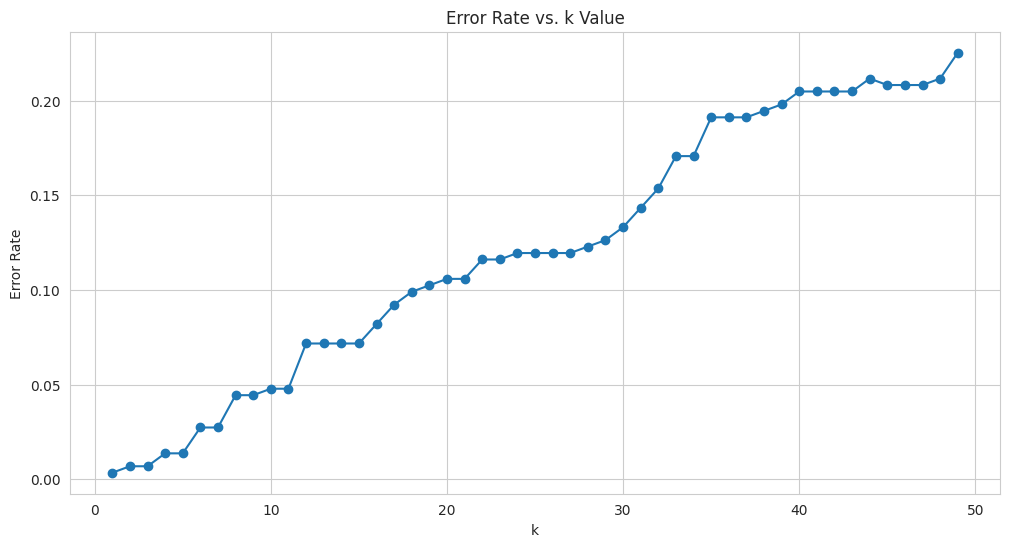

In [ ]:
errors = elbowPointPlot(X, y, range(1,50))
# Choose k=2

In [ ]:
# Get unique classes
#random.seed(1234)
classes = dfCancer['Severity'].unique()

# Fit knn with k=2:
knn=KNeighborsClassifier(n_neighbors=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Plotting the confusion matrix
confusionPlot(classes, y_test, y_pred).show()

for i in range(3):
    # Fit knn with k=2 for various random states:
    knn=KNeighborsClassifier(n_neighbors=2)
    randN = random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randN)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Plotting the confusion matrix
    print("Random State = ",randN,":", sep="")
    confusionPlot(classes, y_test, y_pred).show()


In [ ]:
# Fit knn with k=2:
knn=KNeighborsClassifier(n_neighbors=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#random.seed(1234)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))